In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [86]:
data=pd.read_csv('data.csv')
print(data[:20])

                   date      price  bedrooms  bathrooms  sqft_living  \
0   2014-05-02 00:00:00   313000.0       3.0       1.50         1340   
1   2014-05-02 00:00:00  2384000.0       5.0       2.50         3650   
2   2014-05-02 00:00:00   342000.0       3.0       2.00         1930   
3   2014-05-02 00:00:00   420000.0       3.0       2.25         2000   
4   2014-05-02 00:00:00   550000.0       4.0       2.50         1940   
5   2014-05-02 00:00:00   490000.0       2.0       1.00          880   
6   2014-05-02 00:00:00   335000.0       2.0       2.00         1350   
7   2014-05-02 00:00:00   482000.0       4.0       2.50         2710   
8   2014-05-02 00:00:00   452500.0       3.0       2.50         2430   
9   2014-05-02 00:00:00   640000.0       4.0       2.00         1520   
10  2014-05-02 00:00:00   463000.0       3.0       1.75         1710   
11  2014-05-02 00:00:00  1400000.0       4.0       2.50         2920   
12  2014-05-02 00:00:00   588500.0       3.0       1.75         

#Check whether there is any null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

#Lets find out how many unique values are present in each column

In [6]:
for value in data:
    print('For {},{} unique values present'.format(value,data[value].nunique()))

For date,70 unique values present
For price,1741 unique values present
For bedrooms,10 unique values present
For bathrooms,26 unique values present
For sqft_living,566 unique values present
For sqft_lot,3113 unique values present
For floors,6 unique values present
For waterfront,2 unique values present
For view,5 unique values present
For condition,5 unique values present
For sqft_above,511 unique values present
For sqft_basement,207 unique values present
For yr_built,115 unique values present
For yr_renovated,60 unique values present
For street,4525 unique values present
For city,44 unique values present
For statezip,77 unique values present
For country,1 unique values present


In [88]:
data["city"].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

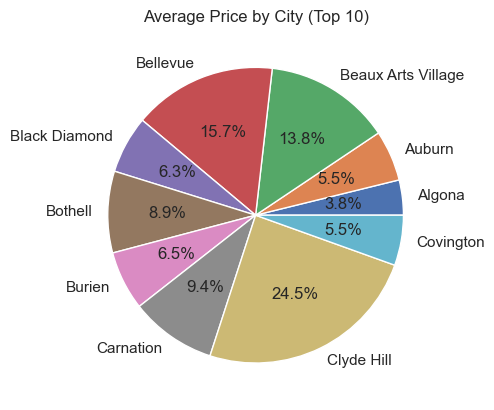

In [90]:
Data = data.groupby("city")["price"].mean().head(10)
plt.pie(Data, labels=Data.index, autopct='%1.1f%%')
plt.title('Average Price by City (Top 10)')
plt.show()

In [7]:
data.shape

(4600, 18)

In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


#Data Visulaization

<Figure size 1000x600 with 0 Axes>

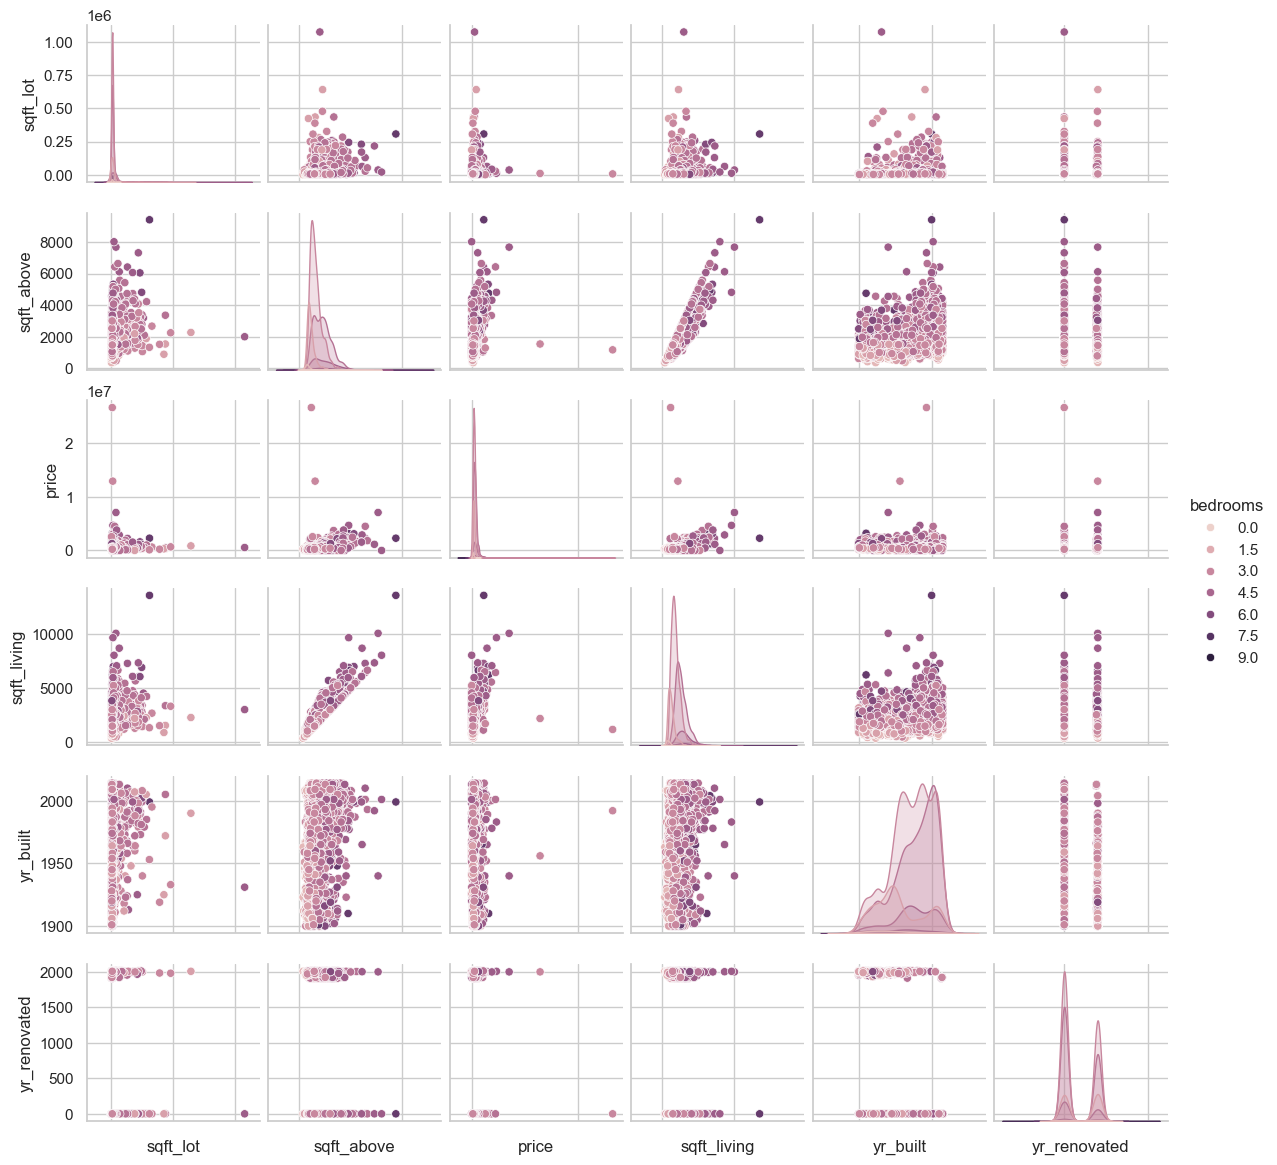

In [10]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(data[['sqft_lot','sqft_above','price','sqft_living','bedrooms','yr_built','yr_renovated']]
                 ,hue='bedrooms',height=2)
g.set(xticklabels=[])

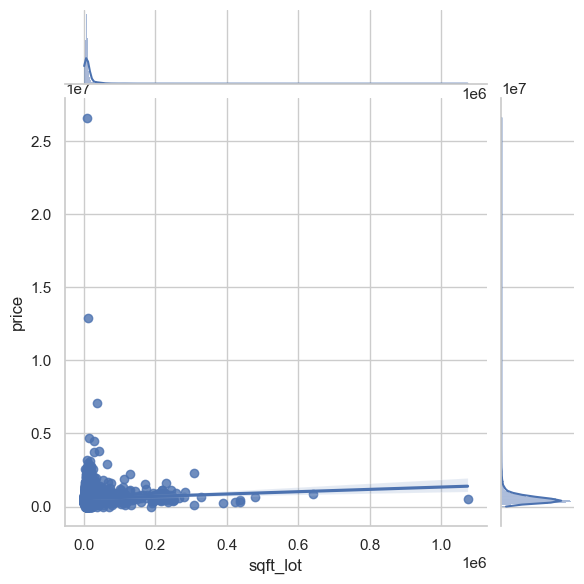

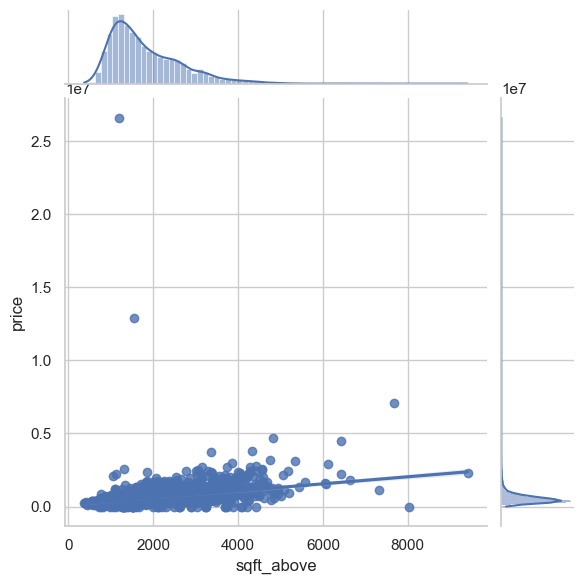

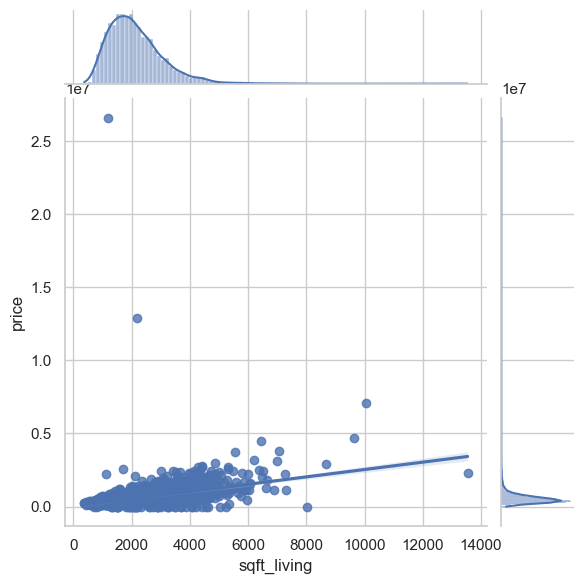

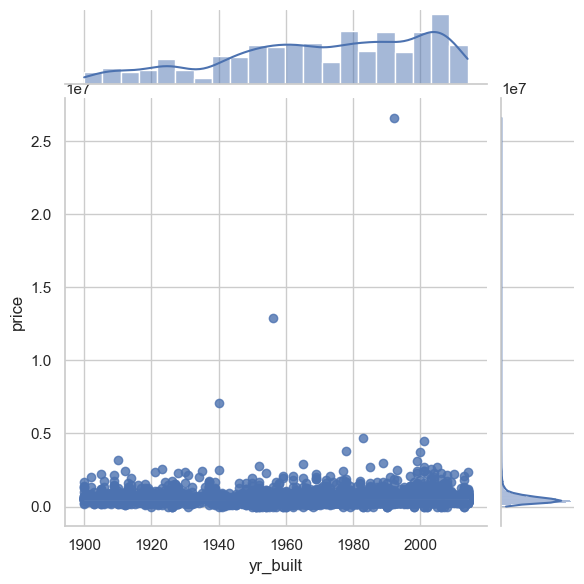

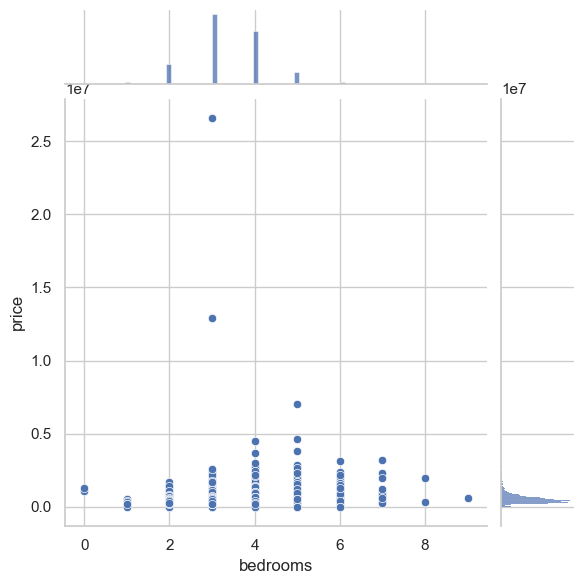

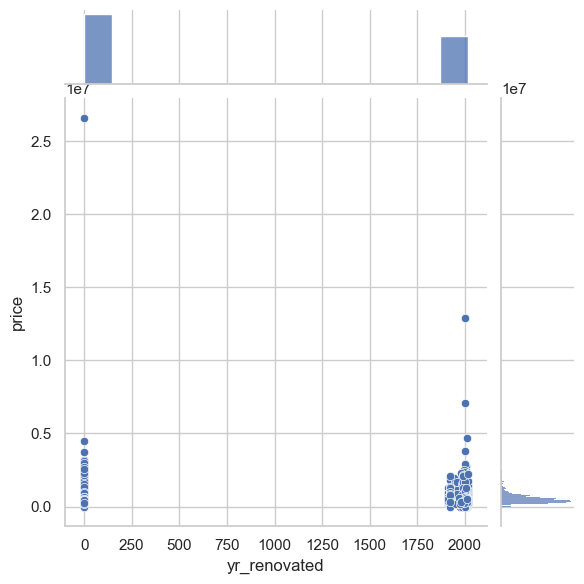

In [11]:
sns.jointplot(x='sqft_lot',y='price',data=data,kind='reg')
sns.jointplot(x='sqft_above',y='price',data=data,kind='reg')
sns.jointplot(x='sqft_living',y='price',data=data,kind='reg')
sns.jointplot(x='yr_built',y='price',data=data,kind='reg')
sns.jointplot(x='bedrooms',y='price',data=data,kind='scatter')
sns.jointplot(x='yr_renovated',y='price',data=data,kind='scatter')

<Axes: xlabel='floors'>

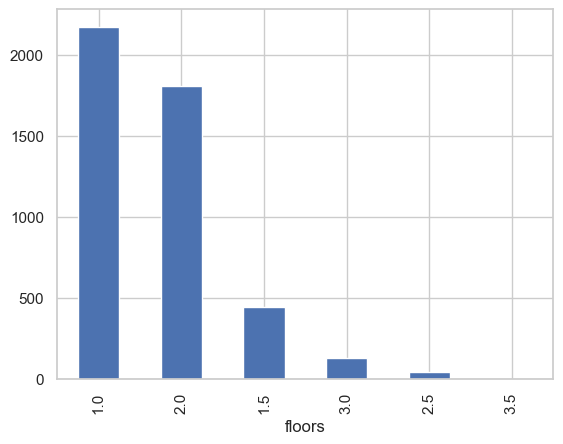

In [12]:
data['floors'].value_counts().plot(kind='bar')

Text(0, 0.5, 'price')

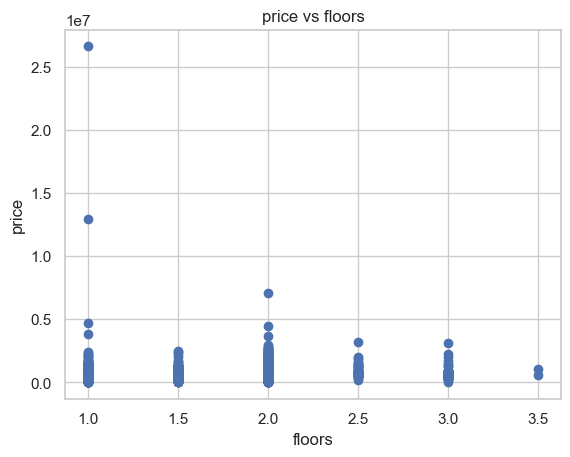

In [13]:
plt.scatter(data.floors,data.price)
plt.title("price vs floors")
plt.xlabel("floors")
plt.ylabel("price")

Text(0, 0.5, 'price')

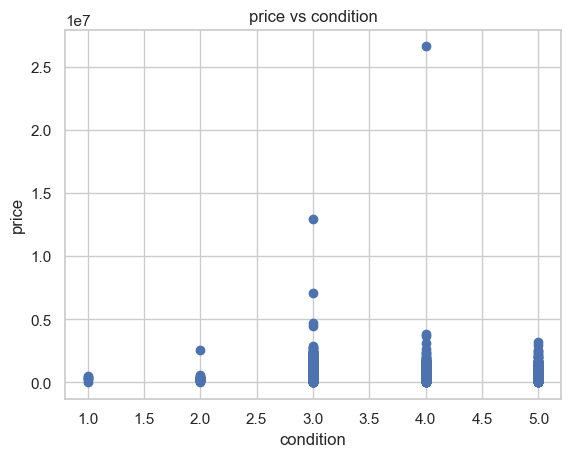

In [14]:
plt.scatter(data.condition,data.price)
plt.title("price vs condition")
plt.xlabel("condition")
plt.ylabel("price")

Co relation between Variables

<Axes: >

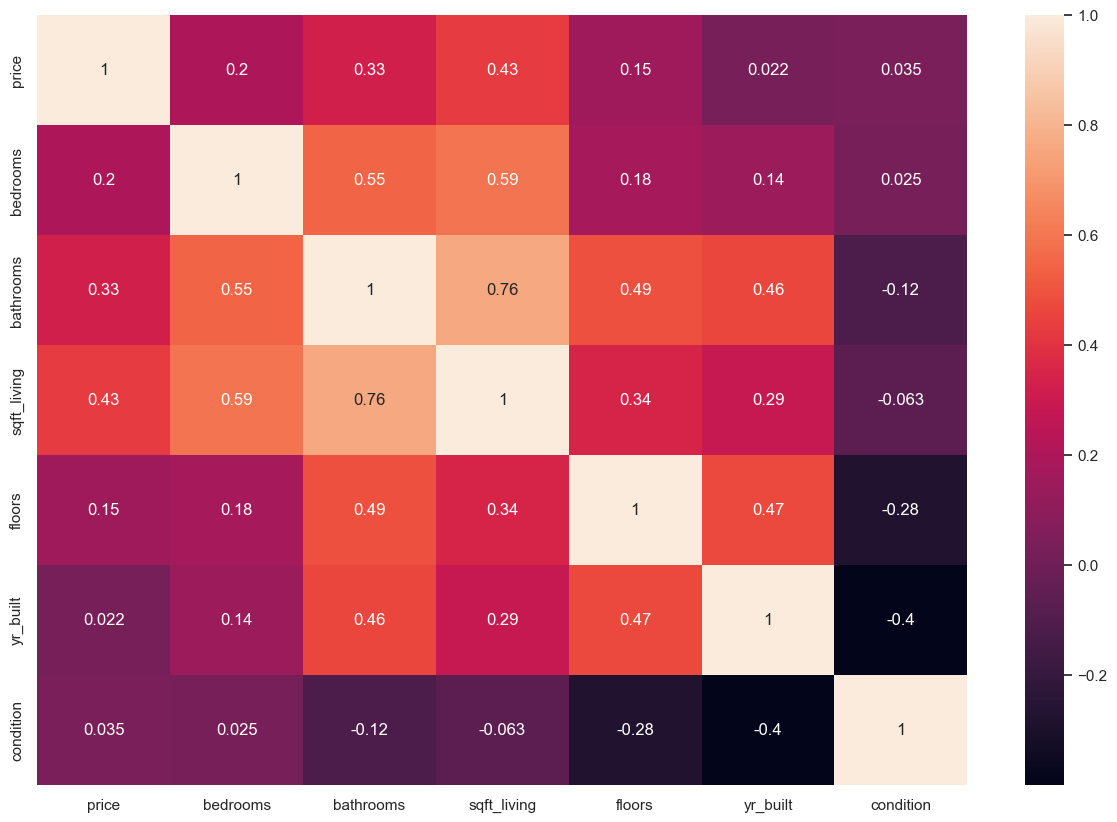

In [16]:
plt.figure(figsize=(15,10))
columns =['price','bedrooms','bathrooms','sqft_living','floors','yr_built','condition']
sns.heatmap(data[columns].corr(),annot=True)

In [17]:

data=pd.get_dummies(data,columns=['city'])
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,statezip,country,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Inglewood-Finn Hill,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,WA 98133,USA,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,WA 98119,USA,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,WA 98042,USA,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,WA 98008,USA,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,WA 98052,USA,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,WA 98133,USA,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,WA 98007,USA,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,WA 98059,USA,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [18]:
data=pd.get_dummies(data,columns=['country'])
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,statezip,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Inglewood-Finn Hill,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,country_USA
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,WA 98133,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,WA 98119,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,WA 98042,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,WA 98008,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,WA 98052,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,WA 98133,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,WA 98007,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,WA 98059,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [19]:
X=data.drop(['yr_built','yr_renovated','price','bathrooms','floors','waterfront','condition','view','street','statezip','date','sqft_lot','sqft_above','sqft_basement'],axis=1)
X[:50]

,bedrooms,sqft_living,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Inglewood-Finn Hill,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,country_USA
0,3.0,1340,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
1,5.0,3650,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
2,3.0,1930,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,3.0,2000,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,4.0,1940,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
5,2.0,880,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
6,2.0,1350,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
7,4.0,2710,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8,3.0,2430,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9,4.0,1520,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True


In [20]:
X.shape

(4600, 47)

In [21]:
Y=data['price']
Y[:50]

0      313000.0
1     2384000.0
2      342000.0
3      420000.0
4      550000.0
5      490000.0
6      335000.0
7      482000.0
8      452500.0
9      640000.0
10     463000.0
11    1400000.0
12     588500.0
13     365000.0
14    1200000.0
15     242500.0
16     419000.0
17     367500.0
18     257950.0
19     275000.0
20     750000.0
21     435000.0
22     626000.0
23     612500.0
24     495000.0
25     285000.0
26     615000.0
27     698000.0
28     675000.0
29     790000.0
30     382500.0
31     499950.0
32     650000.0
33     625000.0
34     400000.0
35     604000.0
36     440000.0
37     287200.0
38     403000.0
39     750000.0
40     335000.0
41     260000.0
42     308500.0
43     439950.0
44     235000.0
45     315000.0
46     437500.0
47     407500.0
48     445700.0
49     838000.0
Name: price, dtype: float64

In [22]:
Y.shape

(4600,)

"""**SPLITTING DATASET TO TRAINING DATA AND TESTING DATA**"""

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=20,shuffle=True)
print(f"x_train={x_train[:]}")
print(f"x_test={x_test[:5]}")
print(f"y_train={y_train[:5]}")
print(f"y_test={y_test[:5]}")

x_train=      bedrooms  sqft_living  city_Algona  city_Auburn  \
2877       3.0         1820        False        False   
1068       5.0         1930        False        False   
4112       3.0         1140        False        False   
2340       4.0         3280        False        False   
3843       3.0         1320        False        False   
...        ...          ...          ...          ...   
1607       3.0         1590        False         True   
3915       4.0         1890        False         True   
1428       3.0         1300        False        False   
4367       3.0         1890        False        False   
2522       3.0         1890        False        False   

      city_Beaux Arts Village  city_Bellevue  city_Black Diamond  \
2877                    False          False               False   
1068                    False          False               False   
4112                    False          False               False   
2340                    False      

#Model on the train data

In [26]:
#Applying Linear Regression Model 
from sklearn.linear_model import LinearRegression
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(x_train, y_train)
#Calculating Details
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(x_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(x_test, y_test))

Linear Regression Train Score is :  0.20746654580610024
Linear Regression Test Score is :  0.5685111320990572


In [27]:
from sklearn.tree import DecisionTreeRegressor
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(x_train,y_train)
tr_regressor.score(x_test,y_test)
print('DecisionTreeRegressor Train Score is : ' ,tr_regressor.score(x_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , tr_regressor.score(x_test, y_test))

DecisionTreeRegressor Train Score is :  0.9822097938740499
DecisionTreeRegressor Test Score is :  0.06985757334051601


In [28]:
print( tr_regressor.predict(x_test) )


[723243.75       590000.         304381.91666667 ... 589500.
 201250.         925000.        ]


In [29]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr.fit(x_train,y_train)
print(regr.feature_importances_)
print('RandomForestRegressor score is : ' , regr.score(x_test, y_test))

[0.         0.98816504 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00869303 0.         0.         0.
 0.00120215 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00193978 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
RandomForestRegressor score is :  0.3712787611200752


In [80]:
print( regr.predict(x_test[:10]) )

[ 853836.84811521  601228.50835124  399626.01672419  795861.73901066
  401101.03783623  399626.01672419 1221606.60631063  401101.03783623
  401101.03783623  401101.03783623]


In [82]:
y_test[:10]

2899     600000.0
61       459990.0
1627     399000.0
202      562000.0
2374     405000.0
1538     230000.0
3002    1320000.0
1300     479000.0
2942     280000.0
756      240000.0
Name: price, dtype: float64

In [30]:
from sklearn.ensemble import  GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators =100 , learning_rate = 1.5 , max_depth = 1)

model.fit(x_train , y_train)
print('GradientBoostingRegressor score is : ' , model.score(x_test, y_test))

GradientBoostingRegressor score is :  0.5103695495879463


In [31]:
print( model.predict(x_test[:10]) )

[ 869359.86394879  428436.56001574  433679.37556014  793899.4406116
  378435.27308172  164743.75071812 1254711.90218567  501090.73280366
  155293.77570218  334625.63021319]


In [32]:
y_test[:10]

2899     600000.0
61       459990.0
1627     399000.0
202      562000.0
2374     405000.0
1538     230000.0
3002    1320000.0
1300     479000.0
2942     280000.0
756      240000.0
Name: price, dtype: float64